In [54]:
# Description: This program uses an artifitial recurrent neural etwork called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Yandex N.V.) using the psast 60 day stock price.

In [55]:
# Import the libraries
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [56]:
# Get the stock qoute from yahoo
df = web.DataReader('YNDX', data_source='yahoo', start='2011-05-24', end='2020-01-13')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-05-24,42.009998,30.549999,35.000000,38.840000,70186700,38.840000
2011-05-25,37.900002,34.400002,37.750000,35.000000,11761600,35.000000
2011-05-26,35.450001,34.000000,34.450001,34.770000,4417500,34.770000
2011-05-27,35.000000,34.000000,34.750000,34.450001,2006000,34.450001
2011-05-31,35.369999,32.610001,34.950001,33.450001,3981100,33.450001
...,...,...,...,...,...,...
2020-01-07,43.430000,42.849998,43.169998,43.169998,1265800,43.169998
2020-01-08,44.060001,43.270000,43.360001,43.770000,1335900,43.770000
2020-01-09,44.770000,44.139999,44.410000,44.540001,2161400,44.540001


In [57]:
# Get the nober of rows  and columns in the data set
df.shape

(2174, 6)

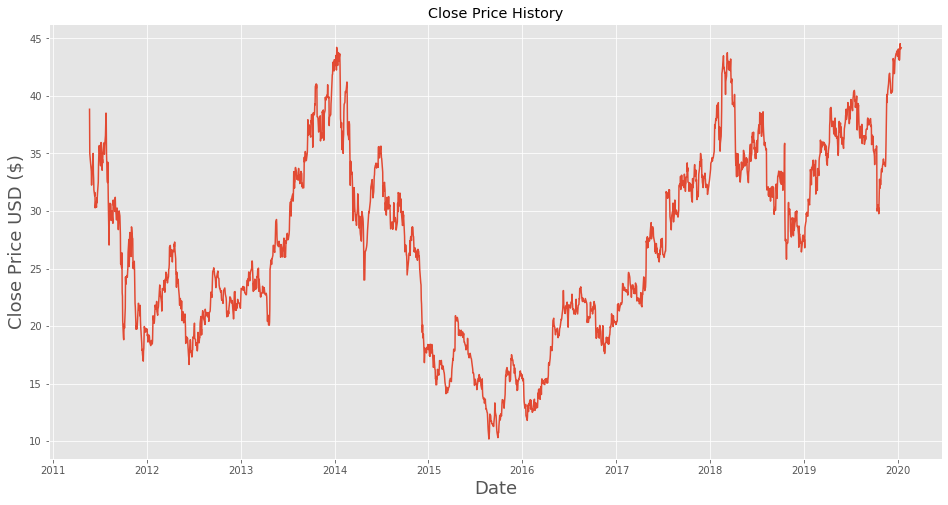

In [58]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()



In [59]:
# Create a new data frame with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number  of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1740

In [60]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.83410941],
       [0.72235155],
       [0.71565773],
       ...,
       [1.        ],
       [0.98603028],
       [0.98966823]])

In [61]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the datat into x_train and y_train data sets
x_train = []
y_train = []

# Into x_train appends in range [0;59]
# Into y_train appends 60th element
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.83410941, 0.72235155, 0.71565773, 0.70634459, 0.67724098,
       0.64231663, 0.67927822, 0.67869614, 0.69994176, 0.72235155,
       0.67258441, 0.6580326 , 0.62980207, 0.61554131, 0.62339929,
       0.5846915 , 0.59225844, 0.60040742, 0.58614665, 0.60972056,
       0.59749704, 0.61088473, 0.62194408, 0.64959253, 0.69295695,
       0.71594872, 0.73719434, 0.742433  , 0.69586727, 0.6912107 ,
       0.69761353, 0.75      , 0.69703144, 0.67986031, 0.70750876,
       0.6981955 , 0.72206056, 0.74883583, 0.74417926, 0.72206056,
       0.72031431, 0.74126894, 0.76775322, 0.79365541, 0.82450517,
       0.80209549, 0.72176946, 0.6580326 , 0.64871946, 0.70023286,
       0.65279394, 0.6009895 , 0.49068685, 0.56984865, 0.56897552,
       0.59604189, 0.59604189, 0.59400464, 0.55296856, 0.57712455])]
[0.5640279050207011]

[array([0.83410941, 0.72235155, 0.71565773, 0.70634459, 0.67724098,
       0.64231663, 0.67927822, 0.67869614, 0.69994176, 0.72235155,
       0.67258441, 0.6580326 , 0.629

In [62]:
# Conver x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [63]:
# Reshape the data for the LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1680, 60, 1)

In [64]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [65]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [83]:
# Fit the model
model.fit(x_train, y_train, batch_size = 1, epochs=1)

Epoch 1/1
1680/1680 [==============================] - 323s 192ms/step - loss: 0.0011


In [84]:
# Create the testing data set
# Create a new array containing scaled values from index 1679 to 2173
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [85]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [86]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [87]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [88]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.sum((predictions - y_test)**2)/len(y_test))
rmse

1.0164330441570117

C:\Users\alexc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


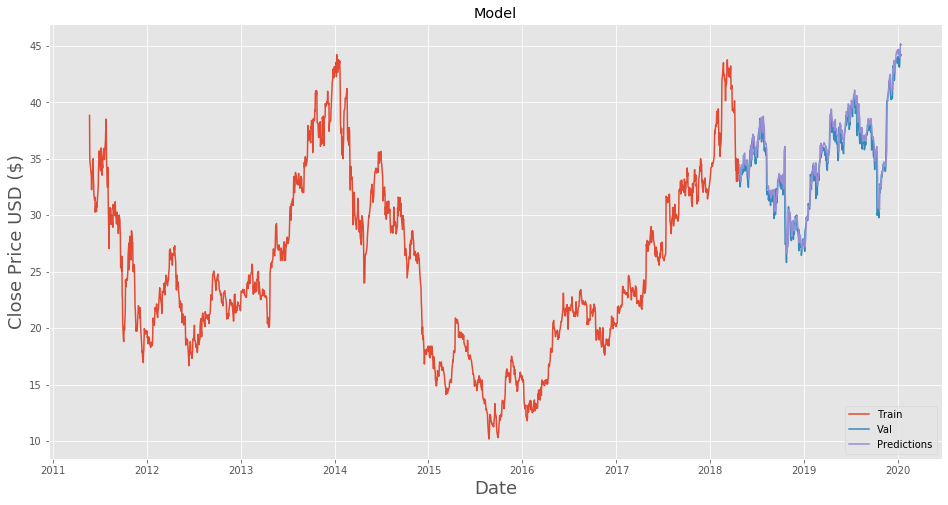

In [89]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [90]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-04-24,33.540001,34.469948
2018-04-25,33.009998,34.134338
2018-04-26,32.730000,33.645191
2018-04-27,32.509998,33.266514
2018-04-30,33.360001,33.006317
...,...,...
2020-01-07,43.169998,43.975681
2020-01-08,43.770000,43.960258
2020-01-09,44.540001,44.427521


In [91]:
mean_error = np.mean(valid['Close']/valid['Predictions'])
mean_error

0.98888179020083

In [96]:
# Get the quote
yandex_quote =  web.DataReader('YNDX', data_source='yahoo', start='2011-05-24', end='2020-01-16')
# Create a new dataframe
new_df = yandex_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list 
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the preicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[44.81307]]
